In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
import re

In [3]:
user_item_data=pd.read_csv("../data/ratings.csv")

In [4]:
user_metadata=pd.read_csv("../data/user_metadata.csv")
user_metadata

,userId,user_given_tags
0,3,classic|sci-fi
1,4,dark comedy|great dialogue|unreliable narrator...
2,19,adventure|anime|ecology|fantasy|Hayao Miyazaki...
3,20,bah
4,68,music
...,...,...
11406,162462,scifi|space|the force
11407,162467,banana|bob|crown
11408,162492,classic sci-fi|EPIC
11409,162512,the book was better


In [5]:
movie_metadata=pd.read_csv("../data/movie_metadata.csv")
movie_metadata

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,animated|animation|cartoon|childhood|children|...
1,2,Jumanji (1995),Adventure|Children|Fantasy,adventure|animals|based on a book|big budget|c...
2,3,Grumpier Old Men (1995),Comedy|Romance,comedy|crappy sequel|destiny|fun movie|good|go...
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,adultery|chick flick|divorce|drinking|feel-goo...
4,5,Father of the Bride Part II (1995),Comedy,comedy|family|father daughter relationship|fee...
...,...,...,...,...
13811,205072,Zombieland: Double Tap (2019),Action|Comedy|Horror,based on book|based on true story|clever|dumb ...
13812,205076,Downton Abbey (2019),Drama,aardman studios|brutality|clever|feel-good|gir...
13813,205383,El Camino: A Breaking Bad Movie (2019),Crime|Drama|Thriller,chase|clever|corruption|crime|drama|good sound...
13814,205425,Dave Chappelle: Sticks & Stones (2019),Comedy,clever|comedy|complex|cult classic|dialogue|dr...


In [6]:
user_item_data

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [7]:
watched_movies=set(user_item_data.movieId.unique())

In [8]:
all_movies=set(movie_metadata.movieId.unique())

In [9]:
watched_movies-all_movies

{131072,
 51,
 131156,
 131180,
 131190,
 130,
 134,
 139,
 142,
 143,
 131292,
 226,
 284,
 131363,
 131448,
 131453,
 131466,
 131472,
 400,
 131474,
 401,
 131476,
 131478,
 131480,
 131482,
 530,
 131614,
 131622,
 560,
 131644,
 576,
 572,
 579,
 131660,
 604,
 607,
 620,
 131690,
 623,
 131696,
 625,
 629,
 636,
 642,
 643,
 644,
 131720,
 657,
 672,
 675,
 676,
 133,
 683,
 684,
 131751,
 131753,
 693,
 699,
 131786,
 723,
 727,
 738,
 739,
 744,
 131820,
 749,
 752,
 131836,
 772,
 131848,
 131850,
 131880,
 812,
 814,
 815,
 131888,
 822,
 131892,
 826,
 855,
 131930,
 859,
 131936,
 873,
 878,
 131960,
 890,
 894,
 975,
 977,
 983,
 132058,
 132068,
 132106,
 132130,
 132136,
 132169,
 1106,
 1109,
 1110,
 132182,
 1115,
 1118,
 1139,
 1140,
 1141,
 1146,
 132224,
 1155,
 1158,
 1159,
 1160,
 1157,
 1166,
 132253,
 132259,
 132270,
 132296,
 132307,
 132344,
 132358,
 132372,
 1309,
 1316,
 1319,
 132402,
 1368,
 1400,
 132472,
 132468,
 132486,
 132488,
 132506,
 1443,
 1325

In [10]:
user_metadata

,userId,user_given_tags
0,3,classic|sci-fi
1,4,dark comedy|great dialogue|unreliable narrator...
2,19,adventure|anime|ecology|fantasy|Hayao Miyazaki...
3,20,bah
4,68,music
...,...,...
11406,162462,scifi|space|the force
11407,162467,banana|bob|crown
11408,162492,classic sci-fi|EPIC
11409,162512,the book was better


In [11]:
user_item_data=user_item_data.merge(movie_metadata,on="movieId")
user_item_data=user_item_data.merge(user_metadata,on="userId")

In [12]:
user_item_data.to_csv("../data/Master_dataset.csv",index=False)

In [13]:
user_item_data.rename(columns={"user_given_tags":"user_tags"},inplace=True)

In [14]:
user_item_data=user_item_data[["user_tags","tag","rating"]]

In [15]:
user_item_data.isna().sum()

user_tags    0
tag          0
rating       0
dtype: int64

In [16]:
user_item_data.dropna(inplace=True)

In [17]:
user_item_data.isna().sum()

user_tags    0
tag          0
rating       0
dtype: int64

In [18]:
import nltk

In [19]:
from nltk.corpus import stopwords

In [20]:
stops=set(stopwords.words('english'))

In [21]:
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [22]:
def preprocess_string(s):
    s=s.lower()
    s=set(s.split("|"))
    s="|".join(s)
    s=s.replace("|"," ")
    preprocessed=re.sub("[^a-zA-Z\s]","",s)
    preprocessed=re.sub(r"\s{2,}", " ",preprocessed)
    return preprocessed

In [23]:
preprocess_string("bloody|Crime gone awry|dark humor|gangster's|imdb top 250")

'bloody crime gone awry gangsters imdb top dark humor'

In [24]:
user_item_data["user_tags"]=user_item_data["user_tags"].apply(lambda x: preprocess_string(x))
user_item_data["tag"]=user_item_data["tag"].apply(lambda x: preprocess_string(x))

In [25]:
user_item_data["user_tags_length"]=user_item_data["user_tags"].apply(lambda x: len(x))
user_item_data["movie_tag_length"]=user_item_data["tag"].apply(lambda x:len(x))

In [26]:
user_item_data

,user_tags,tag,rating,user_tags_length,movie_tag_length
0,classic scifi,nonlinear bloody storytelling hit men crime go...,5.0,13,182
1,classic scifi,kurosawa tragedy visual epic samurai stylized ...,5.0,13,148
2,classic scifi,sci fi original future genetics futuristic sci...,5.0,13,183
3,classic scifi,visual original dancing stylized love cinemato...,3.0,13,163
4,classic scifi,fantasy world wizards book was better epic big...,4.0,13,207
...,...,...,...,...,...
3686636,creepy gothic,judaism german medieval weird original talky c...,4.0,13,131
3686637,creepy gothic,russian witch suspense horror dark fantasy eer...,4.0,13,153
3686638,creepy gothic,haunted house ominous ghosts suspense original...,3.5,13,154
3686639,creepy gothic,suspense horror original revenge macabre murde...,4.0,13,134


In [35]:
user_item_data.user_tags_length.max()

42545

In [28]:
user_item_data.describe()

,rating,user_tags_length,movie_tag_length
count,3.686641e+06,3.686641e+06,3.686641e+06
mean,3.496950e+00,6.270069e+02,1.701350e+02
std,1.014067e+00,2.153686e+03,2.190607e+01
min,5.000000e-01,0.000000e+00,1.040000e+02
25%,3.000000e+00,2.600000e+01,1.550000e+02
50%,3.500000e+00,8.500000e+01,1.680000e+02
75%,4.000000e+00,3.800000e+02,1.840000e+02
max,5.000000e+00,4.254500e+04,2.600000e+02


In [29]:
user_item_data["movie_tag_length"].max()

260

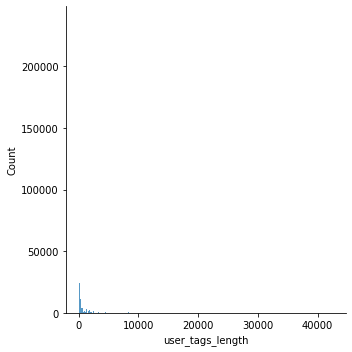

In [30]:
sns.displot(user_item_data["user_tags_length"])

In [31]:
user_item_data["rating"].value_counts()

4.0    904366
3.5    681464
3.0    602653
4.5    431394
5.0    365077
2.5    265619
2.0    207150
1.0     81941
1.5     81016
0.5     65961
Name: rating, dtype: int64

In [32]:
user_item_data["rating"]=user_item_data["rating"].apply(lambda x: int(x+1))

In [33]:
train,test=train_test_split(user_item_data,test_size=0.35)
test,validation=train_test_split(user_item_data,test_size=0.5)

In [34]:
train.to_csv("../input/train_user_item.csv",index=False)
test.to_csv("../input/test_user_item.csv",index=False)
validation.to_csv("../input/validation_user_item.csv",index=False)